In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression

In this lab, we are going to implement a Linear Regression model "by hand" and also use sklearn to implement linear regressors using different basis functions, and then add regularization to the models.



## Part 1 - Synthetic and real datasets

* Generate 50 points in a line in the interval $[0, 10]$ for `x`, perturbed by a small gaussian noise. For example, `y = 2 * x + 5 + noise` where `noise` is taken from a normal distribution.
* plot the generated data as a scatter plot, and the line without noise as a reference

*Note:* If you want to generate the same data as I generated, use $y = 3x + 5 + \epsilon$ after setting the random seed to 0

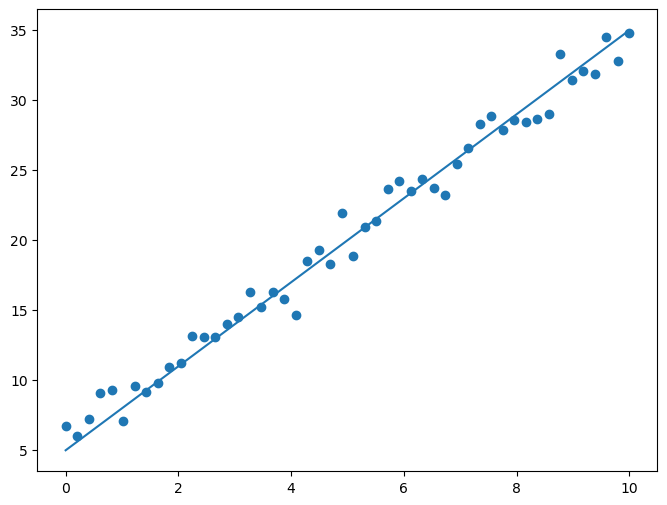

In [20]:
np.random.seed(0)
x = np.linspace(0, 10, 50)
noise = np.random.normal(0, 1, 50)
y = 3 * x + 5 + noise
y_line = 3 * x + 5
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, y_line)

### Load the housing dataset

For this lab we will be using the raw version of the Housing dataset that you used for the first coursework.

**Housing.txt:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

In [21]:
housing_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing = pd.read_table("housing.csv", names=housing_names, sep='\,')
housing = housing.drop(0,axis=0)
housing

C:\Users\Cliente\AppData\Local\Temp\ipykernel_1304\2044010099.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  housing = pd.read_table("housing.csv", names=housing_names, sep='\,')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.0,0.16551443847757338,0.06781524926686218,0.0,0.273695830477041,0.4558446556550128,0.49567539105883546,0.23838925398768368,0.0,0.18897873782313399,0.2524957633267373,0.6931471805599452,0.08588399412377948,3.2188758248682006
2,0.00023589471383251288,0.0,0.2423020527859238,0.0,0.15942773692810197,0.4369622898362954,0.5781280868848844,0.2993353931326901,0.04255961441879593,0.09981079325195306,0.44031183943833263,0.6931471805599452,0.18603980111083265,3.1179499062782403
3,0.0002356699716511248,0.0,0.2423020527859238,0.0,0.15942773692810197,0.5273203729323218,0.46961735485736217,0.2993353931326901,0.04255961441879593,0.09981079325195306,0.44031183943833263,0.6880025966109696,0.06153318181144175,3.5751506887855933
4,0.00029275286287910716,0.0,0.06304985337243403,0.0,0.13994084925460543,0.5059469094428497,0.36590104731202505,0.3705593212114958,0.08338160893905106,0.06465778883405697,0.5001303346492426,0.6902811074512862,0.032843228788449905,3.5380565643793527
5,0.0007048216302691453,0.0,0.06304985337243403,0.0,0.13994084925460543,0.5230139292868933,0.42416995543600083,0.3705593212114958,0.08338160893905106,0.06465778883405697,0.5001303346492426,0.6931471805599452,0.0947079515416189,3.616308761279101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.0006327106197177769,0.0,0.42045454545454547,0.0,0.32702148701181316,0.45802859246093003,0.5198476246791401,0.11571060925114904,0.0,0.15196727284631473,0.6384887680220813,0.6869375122545108,0.19810871681719253,3.152736022363656
503,0.00043769280743545676,0.0,0.42045454545454547,0.0,0.32702148701181316,0.39899342307227936,0.565337214824266,0.10011073860026859,0.0,0.15196727284631473,0.6384887680220813,0.6931471805599452,0.18466428507552266,3.0726933146901194
504,0.0006117053443038648,0.0,0.42045454545454547,0.0,0.32702148701181316,0.5034020844720096,0.6456949469147998,0.0901890380016797,0.0,0.15196727284631473,0.6384887680220813,0.6931471805599452,0.1024589592179921,3.214867803470662
505,0.0011600567748273284,0.0,0.42045454545454547,0.0,0.32702148701181316,0.482097287092534,0.6364732921973457,0.10841851650460242,0.0,0.15196727284631473,0.6384887680220813,0.6887880032892966,0.12316465334146762,3.1354942159291497


## Part 2 -- Build Linear Regression Models

You will need to implement it twice:

1. using the Normal Equations seen in class (Moore-Penrose pseudo-inverse)
2. using stochastic gradient descent

* **Tip 1:** When you implement the stochastic gradient version it will be crucial to plot the sum of squares error as a function of the iteration
* **Tip 2:** You will need to initialize the weights. Start by choosing them randomly, Gaussian distributed, with a very small variance...

Run some experiments with your stochastic gradient descent version, and think about these questions: 
* what happens with different values of the step parameter? 
* Does the system always converge to the same solution? 
* Are you getting the same solution that you get with the closed form implementation? 
* What happens if you initialize your weights to values that are too big?

Below, I provide some skeletons for your implementations, but feel free to structure your code differently.

Remember to:
* Separate the datasets into training and testing (I used 60% for training)


In [22]:
def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters
        
    Notes
    -----
    The first column of w corresponds to the bias (`w_0`)
    """
    coluna_de_uns = np.ones((X.shape[0], 1), dtype=int)
    X = np.concatenate((coluna_de_uns,X), axis=1)
    y = y.reshape(-1,1)
    w = np.linalg.pinv(X).dot(y)
    return w

    
    
    
def linear_regression_SGD(X, y, lr, max_iter=10):
    """
    Implements a Linear Regression model using Stochastic Gradient Descent
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of samples as rows in X, the values to predict
    lr : float
        Learning rate
    max_iter : int
        number of epochs to use for the gradient descent
    
    Returns
    -------
    w : array
        Learnt parameters
    sse_history : array
        An array that contains the error of the model in every iteration
    Notes
    -----
    This function uses the gradient of the sum of squares function (Equations 3.12, and 3.23 in the Bishop book)
    """
    # Initialize weights
    coluna_de_uns = np.ones((X.shape[0], 1), dtype=int)
    X = np.concatenate((coluna_de_uns,X), axis=1)
    w = np.random.normal(0, 0.01,X.shape[1]).reshape(-1, 1)
    sse_history = []

    # Stochastic Gradient Descent
    for epoch in range(max_iter):
        total_error = 0
        for i in range(X.shape[0]):
            
            y_pred = np.dot(X[i], w)   
            error = y[i] - y_pred
            total_error += error**2
            
            w += lr * error * X[i].reshape(-1, 1)
        
        # Calculate Mean Squared Error for this epoch
        mse = total_error / X.shape[0]
        sse_history.append(mse[0])
        
    return w, sse_history

we can now use this function to learn the parameters for predicting `NOX`

First you will have to prepare the data:
- Separate the features from the target variables (Put the features in a matrix X and the target variable in a vector y)
- Split the data using sklearn's train_test_split.

In [23]:
from sklearn.model_selection import train_test_split
X = housing.drop("NOX",axis=1)
y = housing["NOX"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Now use the functions you coded to learn the weights!

In [24]:
X_train_array = X_train.to_numpy().astype('float64')
y_train_array = np.array(y_train).astype('float64')
lrPI_w = linear_regression_PI(X_train_array, y_train_array)
sgd_w, sse_history = linear_regression_SGD(X_train_array, y_train_array, 0.005, max_iter=100)

In [25]:
print(lrPI_w,'\n')
print(sgd_w,'\n')

[[ 0.46623814]
 [-0.21770323]
 [-0.04328764]
 [ 0.14976596]
 [ 0.01210185]
 [ 0.03568094]
 [ 0.15485067]
 [-0.44657556]
 [ 0.15095904]
 [ 0.06690766]
 [-0.2083887 ]
 [ 0.02567277]
 [ 0.01839287]
 [-0.07022061]] 

[[ 0.1085765 ]
 [-0.00280928]
 [-0.07201232]
 [ 0.18440726]
 [ 0.00110539]
 [ 0.0405212 ]
 [ 0.22234254]
 [-0.26132937]
 [ 0.10094085]
 [ 0.10774113]
 [-0.16833237]
 [ 0.01490168]
 [ 0.1266492 ]
 [ 0.00687322]] 



make a plot that shows the evolution of the sum of squares error

**tip:** make it a callable function that you can reuse for the next task

In [26]:
def plot_sse_history(sse_history):
    """
    Plots the evolution of the sum of squares error (SSE) over epochs.
    
    Parameters
    ----------
    sse_history : list or array
        List of SSE values for each epoch during training.
    """
    epochs = range(1, len(sse_history) + 1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, sse_history, color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Sum of Squares Error (SSE)')
    plt.title('Evolution of Sum of Squares Error (SSE)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

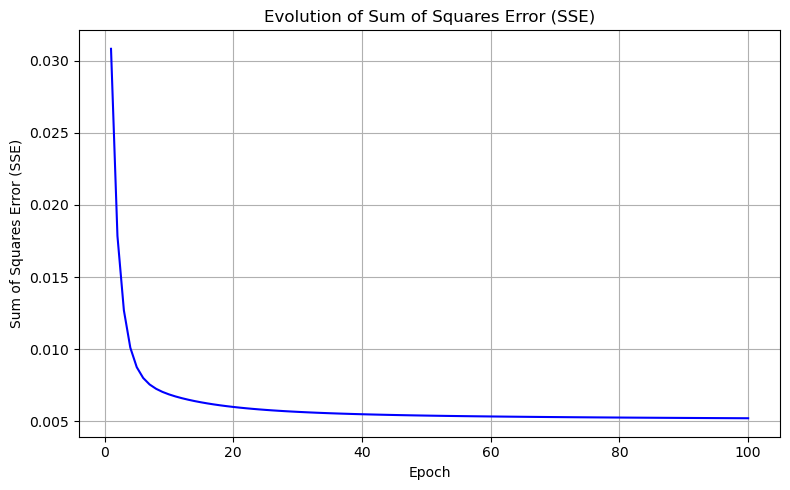

In [27]:
plot_sse_history(sse_history)

Use the learn weights to make predictions for the test set, and evaluate the model using the root mean squared error (remember that the bias is the first column of the weight matrix)
- You can use the function you coded for your coursework, but feel free to use sklearn's `mean_squared_error()` here

In [28]:
from sklearn.metrics import mean_squared_error
X_test_array = X_test.to_numpy().astype('float64')
coluna_de_uns = np.ones((X_test_array.shape[0], 1), dtype=int)
X_test_array = np.concatenate((coluna_de_uns,X_test_array), axis=1) 
y_test_array = np.array(y_test).astype('float64')
lrPI_y_pred = X_test_array@lrPI_w
sgd_y_pred = X_test_array@sgd_w
lrPI_mse = mean_squared_error(y_test,lrPI_y_pred)
sgd_mse = mean_squared_error(y_test,sgd_y_pred)
print(lrPI_mse, '\n', sgd_mse)

0.005719400802560276 
 0.006559562588847321


Repeat the same analysis for predicting `MEDV`

In [29]:
from sklearn.model_selection import train_test_split
X_medv = housing.drop("MEDV",axis=1)
y_medv = housing["MEDV"]

X_train_medv, X_test_medv, y_train_medv, y_test_medv = train_test_split(X_medv, y_medv, test_size=0.4, random_state=42)

In [30]:
X_train_array_medv = X_train_medv.to_numpy().astype('float64')
y_train_array_medv = np.array(y_train_medv).astype('float64')
lrPI_w_medv = linear_regression_PI(X_train_array_medv, y_train_array_medv)
sgd_w_medv, sse_history_medv = linear_regression_SGD(X_train_array_medv, y_train_array_medv, 0.005, max_iter=100)

In [31]:
print(lrPI_w_medv,'\n')
print(sgd_w_medv,'\n')

[[ 3.64106844]
 [-0.95323661]
 [ 0.08010222]
 [ 0.04074675]
 [ 0.15515369]
 [-0.43736608]
 [ 0.4759251 ]
 [-0.074626  ]
 [-0.76948398]
 [ 0.39398176]
 [-0.37196656]
 [-0.47916648]
 [ 0.33094172]
 [-1.58772526]] 

[[ 2.41575413]
 [-0.28014442]
 [ 0.08154676]
 [ 0.06967837]
 [ 0.19234819]
 [ 0.05703241]
 [ 1.37071732]
 [ 0.11195543]
 [ 0.09899041]
 [ 0.06714062]
 [-0.18429785]
 [-0.24292013]
 [ 0.65819856]
 [-1.117283  ]] 



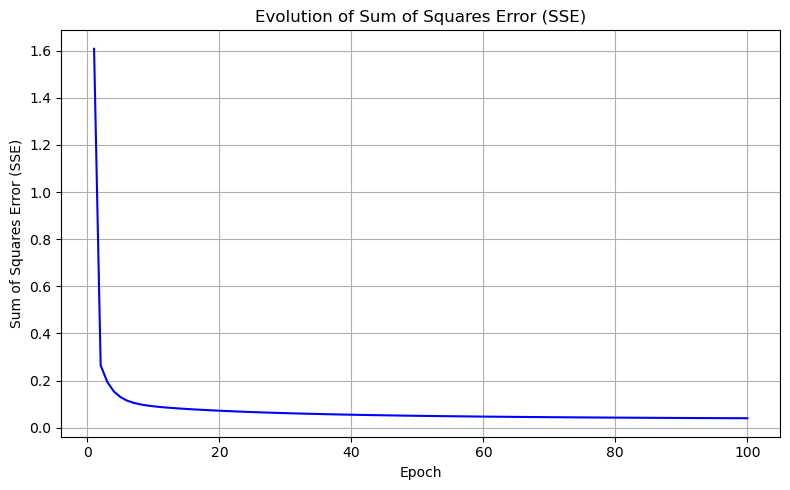

In [32]:
plot_sse_history(sse_history_medv)

In [33]:
#Algo de errado com as previsões
from sklearn.metrics import mean_squared_error
X_test_array_medv = X_test_medv.to_numpy().astype('float64')
coluna_de_uns = np.ones((X_test_array_medv.shape[0], 1), dtype=int)
X_test_array_medv = np.concatenate((coluna_de_uns,X_test_array_medv), axis=1)
y_test_array_medv = np.array(y_test_medv).astype('float64')
lrPI_y_pred_medv = X_test_array_medv@lrPI_w_medv
sgd_y_pred_medv = X_test_array@sgd_w_medv
lrPI_mse_medv = mean_squared_error(y_test_medv,lrPI_y_pred_medv)
sgd_mse_medv = mean_squared_error(y_test_medv,sgd_y_pred_medv)
print(lrPI_mse_medv, '\n', sgd_mse_medv)

0.032959013513093695 
 11.913559809827595


## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



In [1]:
# your code here

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

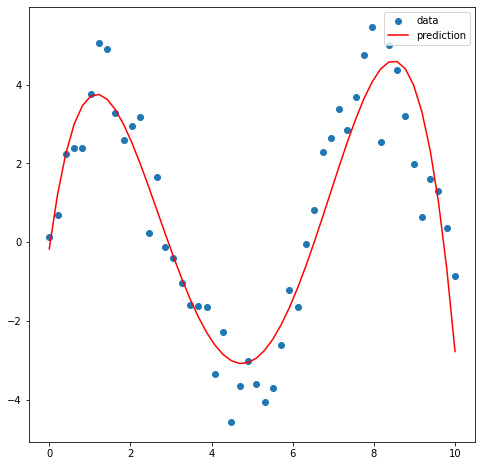

coefficients: [ 0.          7.64947071 -4.52379915  0.77881323 -0.04055327]
intercept: -0.17162172737101145


In [9]:
# your code here